<a href="https://colab.research.google.com/github/seve-cmk/seve-cmk/blob/main/Immo_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir('drive/My Drive/Projet_ML/ProjetML_immoprediction')

Mounted at /content/drive


In [4]:
import pandas as pd
features = pd.read_csv('X_train_J01Z4CN.csv')
print(features.info())
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Target
labels = pd.read_csv('y_train_OXxrJt1.csv')
print(labels.info())
labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_annonce  37368 non-null  int64  
 1   price       37368 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 584.0 KB
None


,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


In [6]:
# Faire la correspondance sur id_annonce
df = features.merge(labels, on='id_annonce')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37368 entries, 0 to 37367
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0


In [7]:
df.isna().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                             512
floor                          27625
land_size                      21787
energy_performance_value       18300
energy_performance_category    18300
ghg_value                      18838
ghg_category                   18838
exposition                     28274
nb_rooms                        1566
nb_bedrooms                     2733
nb_bathrooms                   13273
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
p

In [8]:
df.duplicated().sum()

0

In [9]:
# Séparons les données pour ne pas avoir conflit de données (divisions de données)
from sklearn.model_selection import train_test_split
seed = 123
train_set, test_set = train_test_split(
    df.drop('id_annonce', axis=1),test_size=0.2,
    random_state=seed
)
print("train shape:", train_set.shape, "test shape:", test_set.shape)

train shape: (29894, 27) test shape: (7474, 27)


Pour éviter une fuite de données, Nous allons  créer une copie des données

Analyse exploratoire

In [10]:
# On Crée une copie
real_estate = train_set.copy()

Feature Engineering

In [11]:
real_estate['living_area_per_total_land'] = real_estate['size']/real_estate['land_size']
real_estate['living_area_per_total_land']

10813           NaN
28163    262.088235
2732       0.015584
11636           NaN
34955           NaN
            ...    
7763       0.034836
15377      0.030000
17730      0.719424
28030           NaN
15725      0.226777
Name: living_area_per_total_land, Length: 29894, dtype: float64

In [12]:
real_estate['total_number_of_rooms'] = real_estate['nb_rooms'] + real_estate['nb_bedrooms'] + real_estate['nb_bathrooms']
real_estate['total_number_of_rooms']

10813    11.0
28163     8.0
2732     11.0
11636     NaN
34955     NaN
         ... 
7763      8.0
15377     NaN
17730    15.0
28030     NaN
15725     8.0
Name: total_number_of_rooms, Length: 29894, dtype: float64

In [13]:
real_estate['bedrooms_per_room'] = real_estate['nb_bedrooms']/real_estate['total_number_of_rooms']
real_estate['bedrooms_per_room']

10813    0.454545
28163    0.375000
2732     0.272727
11636         NaN
34955         NaN
           ...   
7763     0.375000
15377         NaN
17730    0.400000
28030         NaN
15725    0.375000
Name: bedrooms_per_room, Length: 29894, dtype: float64

In [14]:
real_estate['total_parking_capacity'] = real_estate['nb_parking_places'] + real_estate['nb_boxes']
real_estate['total_parking_capacity']

10813    1.0
28163    0.0
2732     0.0
11636    0.0
34955    0.0
        ... 
7763     0.0
15377    1.0
17730    0.0
28030    1.0
15725    1.0
Name: total_parking_capacity, Length: 29894, dtype: float64

In [15]:
# ensembel d'equipement
real_estate['num_equipement'] = real_estate['has_a_balcony'] + real_estate['has_a_cellar'] + real_estate['has_a_garage'] + real_estate['has_air_conditioning']
real_estate['num_equipement']

10813    1.0
28163    0.0
2732     0.0
11636    0.0
34955    0.0
        ... 
7763     0.0
15377    0.0
17730    1.0
28030    1.0
15725    1.0
Name: num_equipement, Length: 29894, dtype: float64

In [16]:
pip install geopy

In [17]:
# Calcule de distance entre eiffel et les points de Dataframe
from geopy.distance import geodesic
# Tour eiffel coordinates
eiffel_latitude = 48.8584
eiffel_longitude = 2.2945
# Fonction de calcule de distance entre Tour eiffel et les points
def calculate_distance(row):
  point_latitude = row['approximate_latitude']
  point_longitude = row['approximate_longitude']
  point_coordinates = (point_latitude, point_longitude)
  eiffel_coordinates = (eiffel_latitude, eiffel_longitude)
  distance = geodesic(point_coordinates, eiffel_coordinates).km
  return distance
  # Apply the function to your dataframe
real_estate['distance_to_eiffel'] = df.apply(calculate_distance, axis=1)
real_estate['distance_to_eiffel']


10813     10.221706
28163    438.641434
2732     349.518045
11636    308.684554
34955    694.015339
            ...    
7763     230.063461
15377    192.526752
17730    343.556647
28030    305.095106
15725    421.133416
Name: distance_to_eiffel, Length: 29894, dtype: float64

In [18]:
# Exemple de calcule de notre variable
real_estate[['city', 'distance_to_eiffel']].sample(10)

,city,distance_to_eiffel
19247,port-saint-louis-du-rhone,638.513130
13934,arras,163.125457
28165,paris-7eme,2.293460
7316,elancourt,26.747547
16522,saint-aunes,594.445884
4859,sains-en-amienois,106.579368
27886,marsillargues,595.710751
13396,gye-sur-seine,183.050071
8705,menton,691.638997
11397,paris-15eme,2.437154


In [19]:
#Resumé statistiques
real_estate.describe().T


,count,mean,std,min,25%,50%,75%,max
approximate_latitude,29894.0,46.554705,2.354314,41.374436,43.930923,46.965949,48.842526,5.104601e+01
approximate_longitude,29894.0,2.607762,2.592422,-4.733545,1.089791,2.378397,4.567152,9.483665e+00
postal_code,29894.0,53712.291898,28786.435880,1000.000000,30210.000000,59000.000000,78230.000000,9.588000e+04
size,29477.0,1095.707060,5629.776972,1.000000,73.000000,115.000000,239.000000,4.113110e+05
floor,7813.0,3.457827,6.628996,1.000000,1.000000,2.000000,4.000000,5.500000e+01
land_size,12424.0,4005.178686,59071.859008,1.000000,363.000000,797.000000,1836.250000,6.203700e+06
energy_performance_value,15210.0,206.996121,872.853538,0.000000,125.000000,180.000000,240.000000,1.000000e+05
ghg_value,14791.0,32.323372,322.041271,0.000000,8.000000,16.000000,36.000000,1.702400e+04
nb_rooms,28634.0,4.234826,2.935642,0.000000,3.000000,4.000000,5.000000,1.250000e+02
nb_bedrooms,27707.0,2.854946,2.147069,0.000000,2.000000,3.000000,4.000000,1.180000e+02


In [20]:
# Table de fréquence de mes variables qualitatives
for col in list(real_estate.select_dtypes(include='object')):
  print('----------Colonne :', col, 'avec', real_estate[col].nunique(), 'modalités--------')
  print(real_estate[col].value_counts(normalize=True))
  print('\n')

----------Colonne : property_type avec 22 modalités--------
appartement          0.421757
maison               0.419315
divers               0.057403
terrain              0.041614
villa                0.020272
propriété            0.010470
terrain à bâtir      0.007794
duplex               0.005921
viager               0.004616
ferme                0.003512
parking              0.002710
loft                 0.001338
chalet               0.001338
château              0.000602
moulin               0.000368
manoir               0.000335
péniche              0.000201
hôtel particulier    0.000167
chambre              0.000134
gîte                 0.000067
hôtel                0.000033
atelier              0.000033
Name: property_type, dtype: float64


----------Colonne : city avec 7702 modalités--------
toulouse                0.012544
montpellier             0.010035
paris-16eme             0.006590
paris-17eme             0.006322
paris-18eme             0.006055
                        

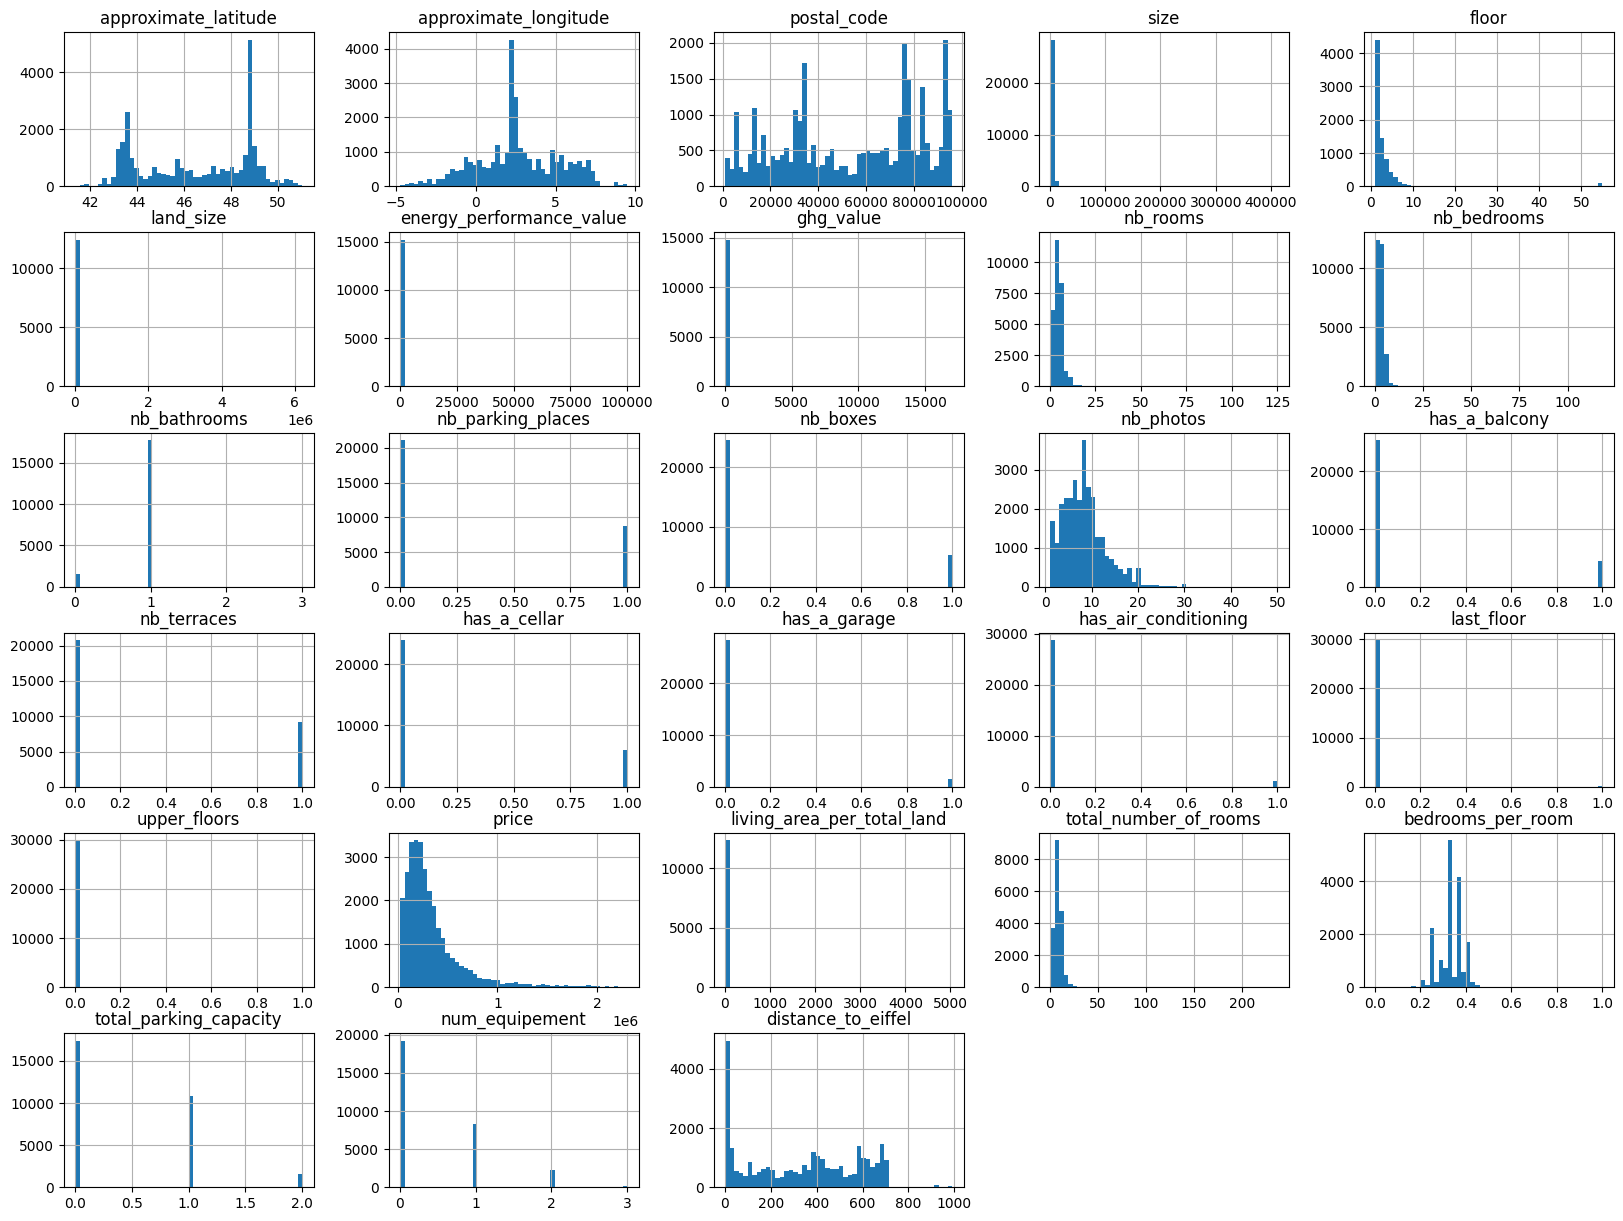

In [21]:
# Histogramme
real_estate.hist(bins=50, figsize = (20,15));

In [22]:
# Affichage de carte
import plotly.express as px
px.scatter(real_estate, x = 'approximate_longitude', y = 'approximate_latitude', size = 'price', color = 'price')
